# 추론통계 - 가설검정

In [1]:
# 패키지 임포트 
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import pandas as pd # pandas package
import numpy as np  # numpy package  
import math
from scipy import stats  # Scipy Package 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline


# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

###  Scipy 확률 분포 클래스 

| 종류 | 명령 | 확률분포 |
|-|-|-|
| 이산 | `bernoulli` | 베르누이분포 |
| 이산 | `binom` |  이항분포 |
| 이산 | `multinomial` |  다항분포 |
| 연속 | `uniform` | 균일분포 |
| 연속 | `norm` | 정규분포 |
| 연속 | `beta` | 베타분포 |
| 연속 | `gamma` | 감마분포 |
| 연속 | `t` | 스튜던트 t분포 |
| 연속 | `chi2` | 카이 제곱분포 |
| 연속 | `f` | F분포 |
| 연속 | `dirichlet` | 디리클리분포 |
| 연속 | `multivariate_normal` | 다변수 정규분포 |

### 확률 분포 매소드 

| 메서드 | 기능 |
|-|-|
| `pmf` | 확률질량함수(probability mass function) |
| `pdf` | 확률밀도함수(probability density function) |
| `cdf` | 누적분포함수(cumulative distribution function)  |
| `ppf` | 누적분포함수의 역함수(inverse cumulative distribution function)  |
| `sf` | 생존함수(survival function) = 1 - 누적분포함수  |
| `isf` | 생존함수의 역함수(inverse survival function)  |
| `rvs` | 랜덤 표본 생성(random variable sampling)    |

## 검정 통계량 

### 1. 모분산을 알고 있는 경우 모평균의 가설 검정 = $Z$ 검정(단일 표본) 

#### Scipy 패키지의 확률 분포 클래스 stats.norm() 사용 

#### 사례) 
- 사람의 평균수명을 알아보기 위해 사망자 100명을 표본으로 추출하여 조사하였더니 평균 71.798년으로 나타났다. 모표준편차를 8.9년으로 가정할 때, 현재의 평균수명은 70년보다 길다고 할 수 있는가를 검정하라(유의수준 α=0.05) 

####  (1) 가설 설정 
- 귀무가설 $𝐻_0:𝜇=70년$
- 대립가설 $𝐻_1:𝜇>70년$ (우측 검정)
- 유의수준 $α=0.05$ 

#### (2) 기각값(임계값)

In [11]:
# 기각값
z_95 = stats.norm.ppf(0.95)  
print(z_95)

1.6448536269514722


#### (3) 검정 통계량 ($z통계량$)

In [3]:
# 변이 분석 
n = 100
m_u = 70
m_sigma = 8.9 
hysis_u = 71.798  

# 검정 통계량 계산 
z = (hysis_u - m_u) / (m_sigma / np.sqrt(n)) 
print(z)

## print(2 * stats.norm().sf(np.abs(z))) # 유의학률 

2.0202247191011256


#### (4) 분포도 작성 및 통계적 결론
- 임계값 1.64 < $z$통계량 2.02, $z$통계량은 기각역에 속함

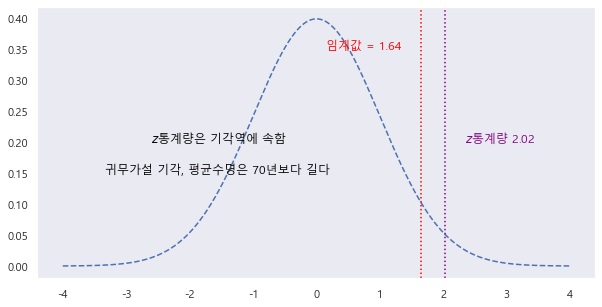

In [4]:
# 시각화 

xx = np.linspace(-4, 4, 1000)
black = {"facecolor": "black"}
plt.figure(figsize=(10, 5))

pdf_norm = stats.norm.pdf(xx)

plt.plot(xx, pdf_norm, 'b--')

# 95%의 임계값 표시 
plt.axvline(x=z_95, color='red', linestyle=':')
plt.text(0.75, .35, '임계값 = ' + str(round(z_95, 2)),
        horizontalalignment='center',color='red')

# 위에서 구한 카이분포통계값 = result[0]
plt.axvline(x=z , color='purple', linestyle=':')
plt.text(2.9, .2, '$z$통계량 '+ str(round(z, 2)),
         horizontalalignment='center', color='purple')
plt.text(-1.5, .2, '$z$통계량은 기각역에 속함  ',
         horizontalalignment='center', color='black')
plt.text(-1.5, .15, '귀무가설 기각, 평균수명은 70년보다 길다  ',
         horizontalalignment='center', color='black')
plt.grid()
plt.show()

### 2. 모분산을 모르고 $n<30$ 경우 모평균의 가설 검정 
#### Scipy 패키지의 확률 분포 클래스 stats.t() 사용  

#### 사례) 
- A편의점의 매운라면의 연평균판매량 46개 였다고 한다. 12곳의 매장을 표본추출하여 매운라면의 판매량을 조사하였더니 표본평균이 42, 표본표준편차가 11.9로 나타났다. 라면 판매량의 모집단은 정규모집단으로 가정했을 때 연평균판매량이 46개보다 적은지 검정하라. (유의수준 𝛼=0.05) 

####  (1) 가설 설정 
- 귀무가설 $𝐻_0:𝜇=46$ 
- 대립가설 $𝐻_1:𝜇<46$ (좌측 검정)
- $𝛼=0.05$

#### (2) 기각값 

In [5]:
# 변이 분석 
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46 

# 95% 좌측검증 기각값 , df: 자유도 
t_95 = -1 * stats.t.ppf(0.95, df=n-1) # 좌측검증 * -1 

print(t_95)

-1.7958848187036691


#### (3) 검정 통계량 ($t통계량$)

In [6]:
# 통계량 t값 계산 
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n)) 
print(t_value)

-1.1644039042479846


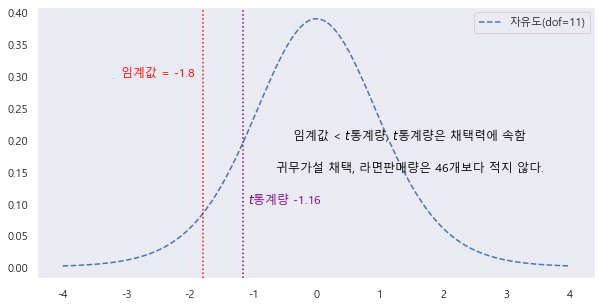

In [7]:
# 시각화 

t_data = np.linspace(-4, 4, 100)
t_dist = stats.t(df=n-1)

black = {"facecolor": "black"}
plt.figure(figsize=(10, 5))

t_dist = stats.t(df=n-1)

plt.plot(t_data, t_dist.pdf(t_data), 'b--', label=("자유도(dof=%d)" % 11))

# 95%의 임계값 표시 
plt.axvline(x=t_95, color='red', linestyle=':')
plt.text(-2.5, .3, '임계값 = ' + str(round(t_95, 2)),
        horizontalalignment='center',color='red')

# 위에서 구한 카이분포통계값 = result[0]
plt.axvline(x=t_value , color='purple', linestyle=':')
plt.text(-0.5, .1, '$t$통계량 '+ str(round(t_value, 2)),
         horizontalalignment='center', color='purple')
plt.text(1.5, .2, '임계값 < $t$통계량, $t$통계량은 채택력에 속함  ',
         horizontalalignment='center', color='black')
plt.text(1.5, .15, '귀무가설 채택, 라면판매량은 46개보다 적지 않다. ',
         horizontalalignment='center', color='black')
plt.grid()
plt.legend()
plt.show()

## p-value( 유의확률:significant probability)
- 유의확률의 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리(tail)부분에 해당하는 영역의 면적 
- 귀무가설이 맞음에도 불구하고 현재 검정통계량값과 같은 혹은 대립가설을 더 옹호하는 검정통계량값이 나올 확률

### 1. 모분산을 모르고 $n<30$ 경우 모평균의 가설 검정' 의 사례 정리 

- 통계량 t = -1.1644039042479846
- 95% 좌측검증 기각값 : -1.7958848187036691
- 자유도 df: 12 - 1 

In [8]:
# 변이 분석 
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46 

# 95% 좌측검증 기각값(유의수준:5%), df: 자유도 
t_95 = round( -1 * stats.t.ppf(0.95, df=n-1), 3 ) # 좌측검증 * -1 

print("기각값 :", t_95)

# 통계량 t값 계산 
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n)) 
print('t통계량 :', round(t_value,3))

기각값 : -1.796
t통계량 : -1.164


In [9]:
# p_value(유의확률) 계산 
round(stats.t(df=11).cdf(t_value),3 )

0.134

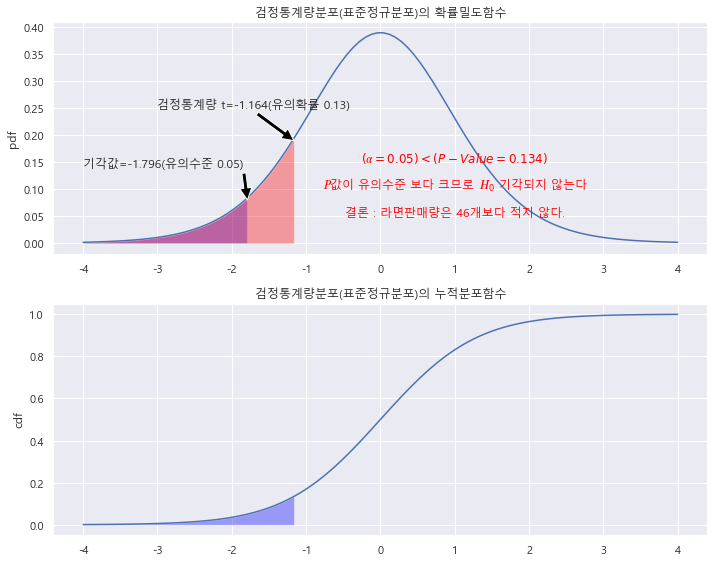

In [10]:
## 시각화 

norm_rv = stats.t(df=11)

xx = np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(xx, norm_rv.pdf(xx))
plt.ylabel("pdf")
plt.title("검정통계량분포(표준정규분포)의 확률밀도함수")
black = {"facecolor": "black"}

# 기각값 texr
plt.annotate('기각값=-1.796(유의수준 0.05)', xy=(-1.79, 0.08), xytext=(-4, 0.14), arrowprops=black)

# 기각값 면적 
xx2 = np.linspace(-4, -1.796, 100)
plt.fill_between(xx2, norm_rv.pdf(xx2), facecolor='blue', alpha=0.35)

# P-value(유의확률) test
plt.annotate('검정통계량 t=-1.164(유의확률 0.13)', xy=(-1.164, 0.19), xytext=(-3, 0.25), arrowprops=black)

# P-value(유의확률) 면적
xx3 = np.linspace(-4, -1.164, 100)
plt.fill_between(xx3, norm_rv.pdf(xx3), facecolor='red', alpha=0.35)

plt.text(1, .15, '$(𝛼 = 0.05) < (P-Value = 0.134)$',
        horizontalalignment='center',color='red')

plt.text(1, .10, '$𝑃$값이 유의수준 보다 크므로 $𝐻_0$ 기각되지 않는다',
        horizontalalignment='center',color='red')

plt.text(1, .05, '결론 : 라면판매량은 46개보다 적지 않다.',
        horizontalalignment='center',color='red')

#누적분포도 
plt.subplot(212)
plt.plot(xx, norm_rv.cdf(xx))

plt.fill_between(xx3, norm_rv.cdf(xx3), facecolor='blue', alpha=0.35)
plt.ylabel("cdf")
plt.title("검정통계량분포(표준정규분포)의 누적분포함수")

plt.tight_layout()
plt.show()